In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk')

In [3]:
def read_exp_res(exp_name):
    control_val = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
    utility_val = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
    control_test = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
    utility_test = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
    similarity_test = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
    return control_val, utility_val, control_test, utility_test, similarity_test

In [4]:
def show_exp_res_tables(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    display("Ctrl Val", df1, "Ctrl Test", df3, "Utility Val", df2, "Utility Test", df4, "Sim Test", df5)
    df_acc = df4[['eps', utility_metric]]
    display("Test " + utility_metric, df_acc)

    df_loss = df5[df5['metric'] == privacy_loss_metric]
    display("All " + privacy_loss_metric, df_loss)

    df_loss_metric = df_loss[['eps', 'mean_all']]
    display("Mean " + privacy_loss_metric, df_loss_metric) 

In [5]:
def plot_exp_res(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    df_u = df4[['eps', utility_metric]]
    df_loss = df5[df5['metric'] == privacy_loss_metric]
    df_loss_metric = df_loss[['eps', 'mean_all']]

    x_u = df_u['eps']
    x_l = df_loss_metric['eps']
    y_u = df_u[utility_metric]
    y_l = df_loss_metric['mean_all']
    no_dp_legend = []
    if x_u[0] == "no_dp":
        x_u = x_u[1:]
        x_l = x_l[1:]
        x_u = np.array(x_u, dtype=float)
        x_l = np.array(x_l, dtype=float)
        plt.hlines(y_u[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        plt.hlines(y_l[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        no_dp_legend = [exp_name + "_gen_no_dp_" + utility_metric, exp_name + "_gen_no_dp_" + privacy_loss_metric]
        y_u = y_u[1:]
        y_l = y_l[1:]
    
    x_u = np.array(x_u, dtype=int)
    x_l = np.array(x_l, dtype=int)

    plt.plot(x_u, y_u, color=next(cycol))
    plt.plot(x_l, y_l, color=next(cycol))
    plt.xlabel("eps")
    return [exp_name + "_" + utility_metric, exp_name + "_" + privacy_loss_metric] + no_dp_legend



In [6]:
def process_res(exp_name, show_tables=False, utility_metric="acc", privacy_loss_metric = "hamming"):
    tables = read_exp_res(exp_name)
    if show_tables:
        show_exp_res_tables(exp_name, *tables, utility_metric, privacy_loss_metric)
    legend = plot_exp_res(exp_name, *tables, utility_metric, privacy_loss_metric)
    return legend

'exp_6_1'

'Ctrl Val'

,date,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593472e+09,0,0,-22.499128,835,5,9,831,0.991667


'Ctrl Test'

,date,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593472e+09,0,0,-22.499128,1187,13,10,1190,0.990417


'Utility Val'

,date,eps,maxdelta,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.596208e+09,no_dp,0,0,0,-6.651900,802,38,38,802,0.954762
1,1.596208e+09,no_dp,0,0,0,-6.651900,802,38,38,802,0.954762
2,1.596208e+09,0.5,1,0,0,-3.982102,640,200,307,533,0.698214
3,1.596209e+09,1,1,0,0,-3.922914,643,197,326,514,0.688690
4,1.596209e+09,10,1,0,0,-18.505989,530,310,67,773,0.775595
5,1.596210e+09,20,1,0,0,-14.545981,580,260,65,775,0.806548
6,1.596210e+09,30,1,0,0,-10.521231,643,197,109,731,0.817857
7,1.596211e+09,40,1,0,0,-10.080350,663,177,88,752,0.842262
8,1.596215e+09,50,1,0,0,-6.276320,800,40,190,650,0.863095
9,1.596216e+09,60,1,0,0,-7.140821,786,54,137,703,0.886310


'Utility Test'

,date,eps,maxdelta,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.596208e+09,no_dp,0,0,0,-6.651900,1149,51,64,1136,0.952083
1,1.596209e+09,0.5,1,0,0,-3.982102,936,264,442,758,0.705833
2,1.596209e+09,1,1,0,0,-3.922914,899,301,468,732,0.679583
3,1.596209e+09,10,1,0,0,-18.505989,751,449,103,1097,0.770000
4,1.596210e+09,20,1,0,0,-14.545981,818,382,102,1098,0.798333
5,1.596210e+09,30,1,0,0,-10.521231,935,265,170,1030,0.818750
6,1.596211e+09,40,1,0,0,-10.080350,959,241,147,1053,0.838333
7,1.596216e+09,50,1,0,0,-6.276320,1131,69,296,904,0.847917
8,1.596216e+09,60,1,0,0,-7.140821,1127,73,194,1006,0.888750
9,1.596216e+09,70,1,0,0,-5.835390,1162,38,210,990,0.896667


'Sim Test'

,date,eps,maxdelta,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.596208e+09,no_dp,0,0,hamming,0.942494,0.848830,0.895662
1,1.596208e+09,no_dp,0,0,hamming_wise,19.292500,16.242500,17.767500
2,1.596208e+09,no_dp,0,0,cosine,0.040810,0.068301,0.054556
3,1.596209e+09,0.5,1,0,hamming,0.926756,0.847839,0.887297
4,1.596209e+09,0.5,1,0,hamming_wise,18.968333,16.357500,17.662917
5,1.596209e+09,0.5,1,0,cosine,0.378708,0.307055,0.342881
6,1.596209e+09,1,1,0,hamming,0.940452,0.857851,0.899151
7,1.596209e+09,1,1,0,hamming_wise,19.266667,16.480000,17.873333
8,1.596209e+09,1,1,0,cosine,0.542177,0.410479,0.476328
9,1.596209e+09,10,1,0,hamming,0.940852,0.847134,0.893993


'Test acc'

,eps,acc
0,no_dp,0.952083
1,0.5,0.705833
2,1,0.679583
3,10,0.770000
4,20,0.798333
5,30,0.818750
6,40,0.838333
7,50,0.847917
8,60,0.888750
9,70,0.896667


'All hamming'

,date,eps,maxdelta,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.596208e+09,no_dp,0,0,hamming,0.942494,0.848830,0.895662
3,1.596209e+09,0.5,1,0,hamming,0.926756,0.847839,0.887297
6,1.596209e+09,1,1,0,hamming,0.940452,0.857851,0.899151
9,1.596209e+09,10,1,0,hamming,0.940852,0.847134,0.893993
12,1.596210e+09,20,1,0,hamming,0.941296,0.844472,0.892884
15,1.596210e+09,30,1,0,hamming,0.941510,0.846340,0.893925
18,1.596211e+09,40,1,0,hamming,0.941759,0.846986,0.894373
21,1.596216e+09,50,1,0,hamming,0.942141,0.847503,0.894822
24,1.596216e+09,60,1,0,hamming,0.941969,0.847028,0.894498
27,1.596216e+09,70,1,0,hamming,0.941990,0.847599,0.894795


'Mean hamming'

,eps,mean_all
0,no_dp,0.895662
3,0.5,0.887297
6,1,0.899151
9,10,0.893993
12,20,0.892884
15,30,0.893925
18,40,0.894373
21,50,0.894822
24,60,0.894498
27,70,0.894795


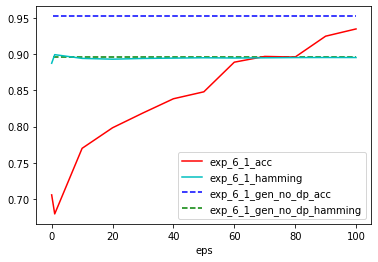

In [10]:
exps = ['exp_6_1']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'exp_4_3'

'Ctrl Val'

,date,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593653e+09,0,0,-18.286108,838,2,21,819,0.98631


'Ctrl Test'

,date,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593653e+09,0,0,-18.286108,1195,5,20,1180,0.989583


'Utility Val'

,date,eps,maxdelta,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593656e+09,no_dp,0,0,0,-7.534684,813,27,31,809,0.965476
1,1.593657e+09,20,1,0,0,-9.897795,698,142,226,614,0.780952
2,1.593657e+09,30,1,0,0,-10.029649,790,50,95,745,0.913690
3,1.593658e+09,40,1,0,0,-8.156675,791,49,74,766,0.926786
4,1.593658e+09,50,1,0,0,-6.980349,794,46,68,772,0.932143
5,1.593659e+09,60,1,0,0,-8.331992,797,43,58,782,0.939881
6,1.593659e+09,100,1,0,0,-7.483974,822,18,46,794,0.961905


'Utility Test'

,date,eps,maxdelta,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593656e+09,no_dp,0,0,0,-7.534684,1167,33,50,1150,0.965417
1,1.593657e+09,20,1,0,0,-9.897795,996,204,322,878,0.780833
2,1.593657e+09,30,1,0,0,-10.029649,1139,61,130,1070,0.920417
3,1.593658e+09,40,1,0,0,-8.156675,1146,54,106,1094,0.933333
4,1.593658e+09,50,1,0,0,-6.980349,1146,54,92,1108,0.939167
5,1.593659e+09,60,1,0,0,-8.331992,1142,58,92,1108,0.937500
6,1.593659e+09,100,1,0,0,-7.483974,1182,18,63,1137,0.966250


'Sim Test'

,date,eps,maxdelta,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.593656e+09,no_dp,0,0,hamming,0.133056,0.249163,0.191110
1,1.593656e+09,no_dp,0,0,hamming_wise,2.811667,4.390000,3.600833
2,1.593656e+09,no_dp,0,0,cosine,0.041970,0.068936,0.055453
3,1.593657e+09,20,1,0,hamming,0.147712,0.282291,0.215001
4,1.593657e+09,20,1,0,hamming_wise,3.148333,5.070000,4.109167
5,1.593657e+09,20,1,0,cosine,0.046045,0.073977,0.060011
6,1.593657e+09,30,1,0,hamming,0.133597,0.255560,0.194578
7,1.593657e+09,30,1,0,hamming_wise,2.830833,4.535833,3.683333
8,1.593657e+09,30,1,0,cosine,0.042270,0.070215,0.056243
9,1.593658e+09,40,1,0,hamming,0.131211,0.249009,0.190110


'Test acc'

,eps,acc
0,no_dp,0.965417
1,20,0.780833
2,30,0.920417
3,40,0.933333
4,50,0.939167
5,60,0.937500
6,100,0.966250


'All hamming'

,date,eps,maxdelta,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.593656e+09,no_dp,0,0,hamming,0.133056,0.249163,0.191110
3,1.593657e+09,20,1,0,hamming,0.147712,0.282291,0.215001
6,1.593657e+09,30,1,0,hamming,0.133597,0.255560,0.194578
9,1.593658e+09,40,1,0,hamming,0.131211,0.249009,0.190110
12,1.593658e+09,50,1,0,hamming,0.132376,0.247919,0.190148
15,1.593659e+09,60,1,0,hamming,0.130403,0.247461,0.188932
18,1.593659e+09,100,1,0,hamming,0.130594,0.248761,0.189677


'Mean hamming'

,eps,mean_all
0,no_dp,0.191110
3,20,0.215001
6,30,0.194578
9,40,0.190110
12,50,0.190148
15,60,0.188932
18,100,0.189677


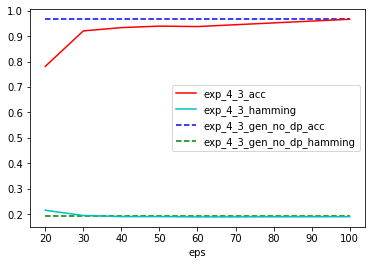

In [12]:
exps = ['exp_4_3']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'exp_3_4'

'Ctrl Val'

,date,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593637e+09,0,0,-20.473918,832,8,18,822,0.984524


'Ctrl Test'

,date,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593637e+09,0,0,-20.473918,1182,18,20,1180,0.984167


'Utility Val'

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593792e+09,20,0,0,-56.215421,282,558,74,766,0.623810
1,1.593792e+09,30,0,0,-32.933847,439,401,176,664,0.656548
2,1.593793e+09,40,0,0,-29.386189,451,389,111,729,0.702381
3,1.593793e+09,50,0,0,-17.194671,838,2,294,546,0.823810


'Utility Test'

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593792e+09,20,0,0,-56.215421,394,806,120,1080,0.614167
1,1.593792e+09,30,0,0,-32.933847,601,599,278,922,0.634583
2,1.593793e+09,40,0,0,-29.386189,622,578,146,1054,0.698333
3,1.593793e+09,50,0,0,-17.194671,1198,2,397,803,0.833750


'Sim Test'

,date,eps,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.593792e+09,20,0,hamming,0.468711,0.429036,0.448874
1,1.593792e+09,20,0,hamming_wise,9.541667,7.877500,8.709583
2,1.593792e+09,20,0,cosine,0.074583,0.066999,0.070791
3,1.593792e+09,30,0,hamming,0.310672,0.277350,0.294011
4,1.593792e+09,30,0,hamming_wise,6.290833,5.095000,5.692917
5,1.593792e+09,30,0,cosine,0.049352,0.040950,0.045151
6,1.593793e+09,40,0,hamming,0.222151,0.193286,0.207719
7,1.593793e+09,40,0,hamming_wise,4.474167,3.531667,4.002917
8,1.593793e+09,40,0,cosine,0.035566,0.027208,0.031387
9,1.593793e+09,50,0,hamming,0.162276,0.144741,0.153509


'Test acc'

,eps,acc
0,20,0.614167
1,30,0.634583
2,40,0.698333
3,50,0.833750


'All hamming'

,date,eps,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.593792e+09,20,0,hamming,0.468711,0.429036,0.448874
3,1.593792e+09,30,0,hamming,0.310672,0.277350,0.294011
6,1.593793e+09,40,0,hamming,0.222151,0.193286,0.207719
9,1.593793e+09,50,0,hamming,0.162276,0.144741,0.153509


'Mean hamming'

,eps,mean_all
0,20,0.448874
3,30,0.294011
6,40,0.207719
9,50,0.153509


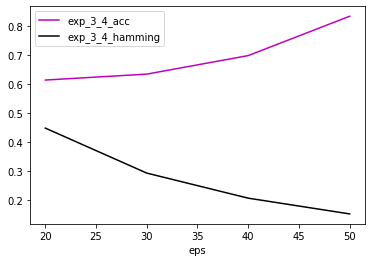

In [13]:
exps = ['exp_3_4']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()